## In this notebook, we will try to use the district wise Census 2011 data for Jorhat, Assam to explore the basic information about the given data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
df = pd.read_csv('jorhat_census.csv', header = 3)

In [3]:
df.shape

(851, 145)

### There are 851 rows and 145 columns in the census data sheet

In [4]:
df_district = df.iloc[0:3,:]
df.drop([0,1,2], inplace = True)
df_sub_district = df[df['10']=='Total']

### So let us use the census 2011 info to draw some housing infographic on the district as a whole

In [5]:
df_new = pd.read_csv('jorhat_census.csv')
df_new = df_new.ix[0,:].reset_index()
df_new_1 = pd.read_csv('jorhat_census.csv')
df_new_1 = df_new_1.ix[1,:].reset_index()
df_new.drop('index', axis = 1, inplace = True)
df_new_1.drop('index', axis = 1, inplace = True)

### Classification of houses based on condition

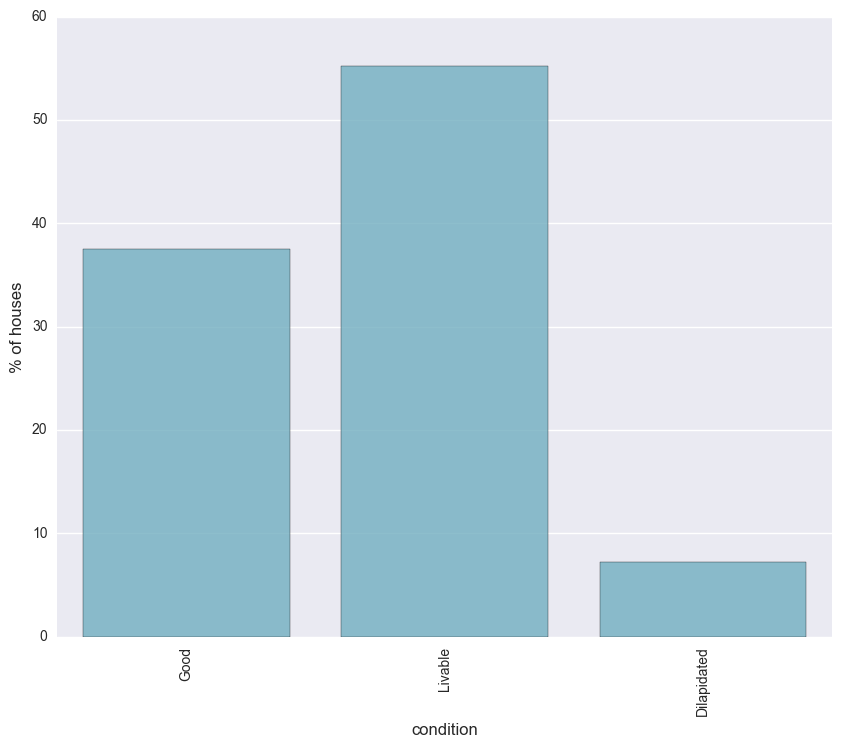

In [6]:
plt.figure(figsize=(10,8))
values = list(df_district.ix[0,11:14])
labels = df_new_1.ix[11:13,1].reset_index()
labels = list(labels[1])
sns.barplot(labels, values, alpha=0.8, color=color[5])
plt.ylabel('% of houses', fontsize=12)
plt.xlabel('condition', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### The number of livable houses is more than average even though the number of good houses is less. well thats almost good

### Classification based on material used in roof

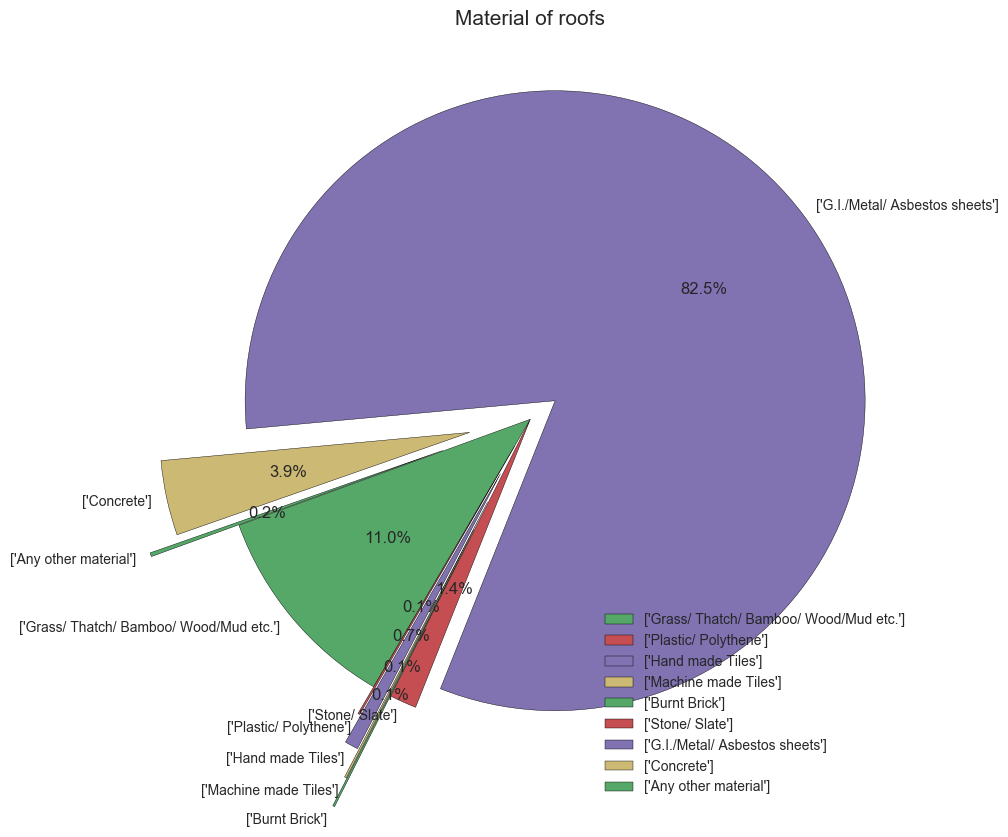

In [7]:
values = np.array(df_district.iloc[0,22:31])
labels = np.array(df_new.iloc[22:31])
plt.figure(figsize=(10,10))
explode = (0, 0.1, 0.2,0.3,0.4,0,0.1,0.2,0.3)
a,b,c = plt.pie(values, labels = labels, autopct='%1.1f%%', startangle=200, colors = color[1:5], labeldistance=1.05, explode=explode)
plt.title("Material of roofs", fontsize=15)
plt.legend(a,labels, loc="lower right")
plt.show()

### G.I./Metal/Asbestos sheets is the most used material for roof in jorhat, followed by grass/Thatch/Bamboo/Wood/Mud etc

### Now let us see the main sources of drinking water for the people of Jorhat

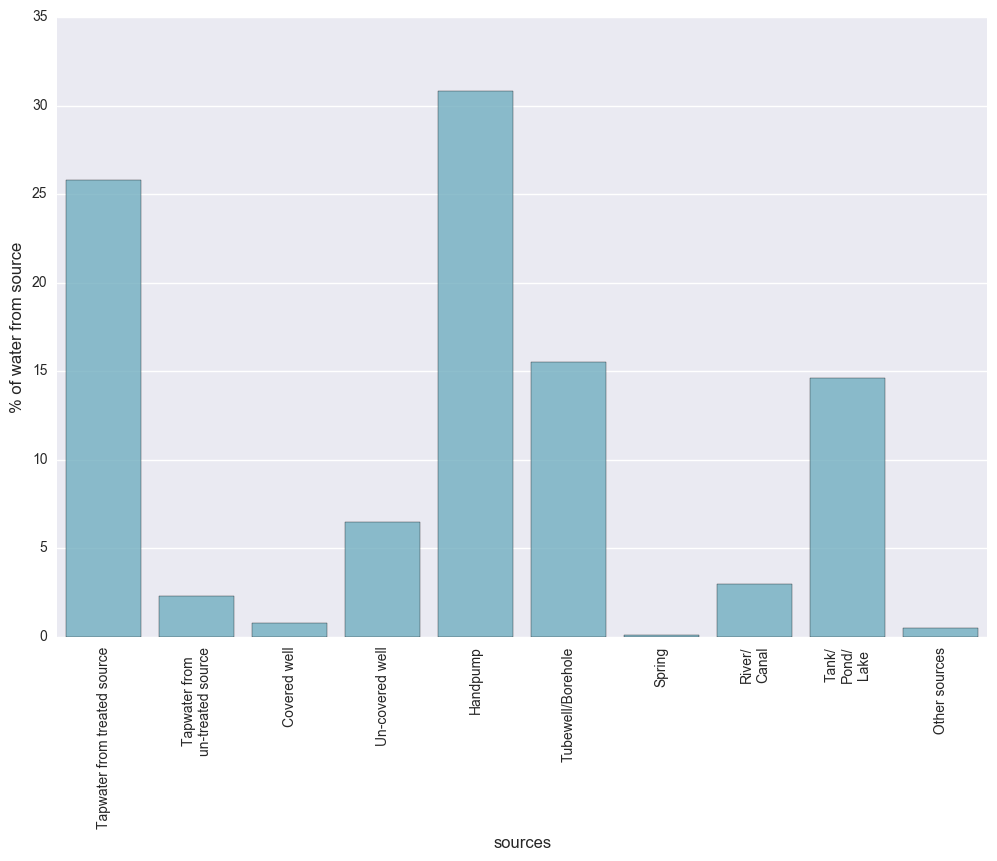

In [8]:
plt.figure(figsize=(12,8))
values = list(df_district.ix[0,71:81])
labels = df_new.ix[71:80].reset_index()
labels = list(labels[0])
sns.barplot(labels, values, alpha=0.8, color=color[5])
plt.ylabel('% of water from source', fontsize=12)
plt.xlabel('sources', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Tapwater from treated source is second in the list next only to Handpump. Thats good news

### Now let us consider the drainage of houses in Jorhat

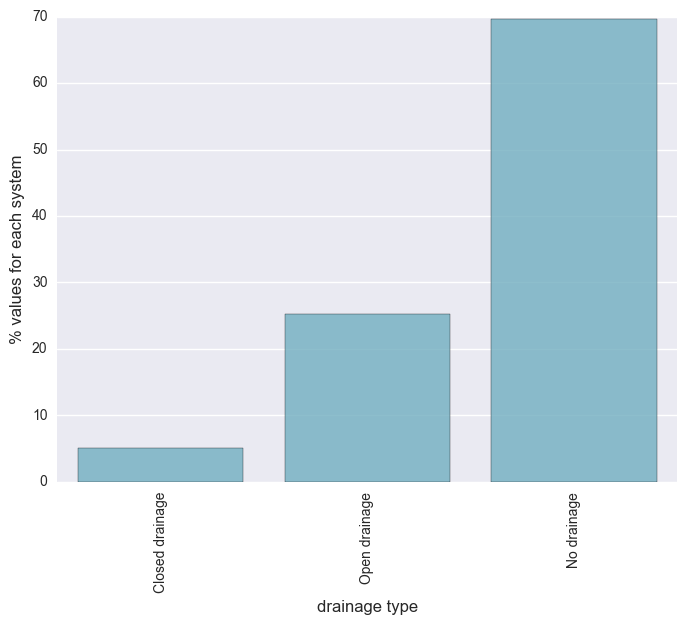

In [9]:
plt.figure(figsize=(8,6))
values = list(df_district.ix[0,105:108])
labels = df_new.ix[105:107].reset_index()
labels = list(labels[0])
sns.barplot(labels, values, alpha=0.8, color=color[5])
plt.ylabel('% values for each system', fontsize=12)
plt.xlabel('drainage type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### From this we cannot really say that the recent water clogging in the streets is due to no drainage. That is just because here we are considering the whole of jorhat which consists of both rural and urban areas.

### Now let us consider the drainage of only the urban areas.

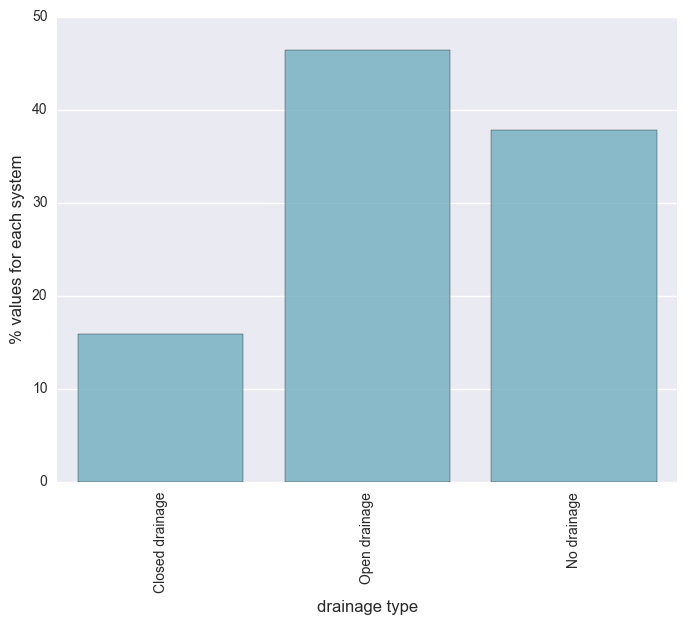

In [10]:
plt.figure(figsize=(8,6))
values = list(df_district.ix[2,105:108])
labels = df_new.ix[105:107].reset_index()
labels = list(labels[0])
sns.barplot(labels, values, alpha=0.8, color=color[5])
plt.ylabel('% values for each system', fontsize=12)
plt.xlabel('drainage type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Strange to see that even in urban areas houses have either open drainage or no drainage at all.  Only a small amount(about 16%) of houses have closed drainage.

### Let us now direct our attention to the sub districts of jorhat

In [11]:
print(df_sub_district['9'])

3           Sub-Dist - Majuli
198    Sub-Dist - Jorhat West
346    Sub-Dist - Jorhat East
440           Sub-Dist - Teok
598        Sub-Dist - Titabor
772        Sub-Dist - Mariani
Name: 9, dtype: object


### There are 6 sub districts. so now let us compare the number of good houses in each of the subdistricts

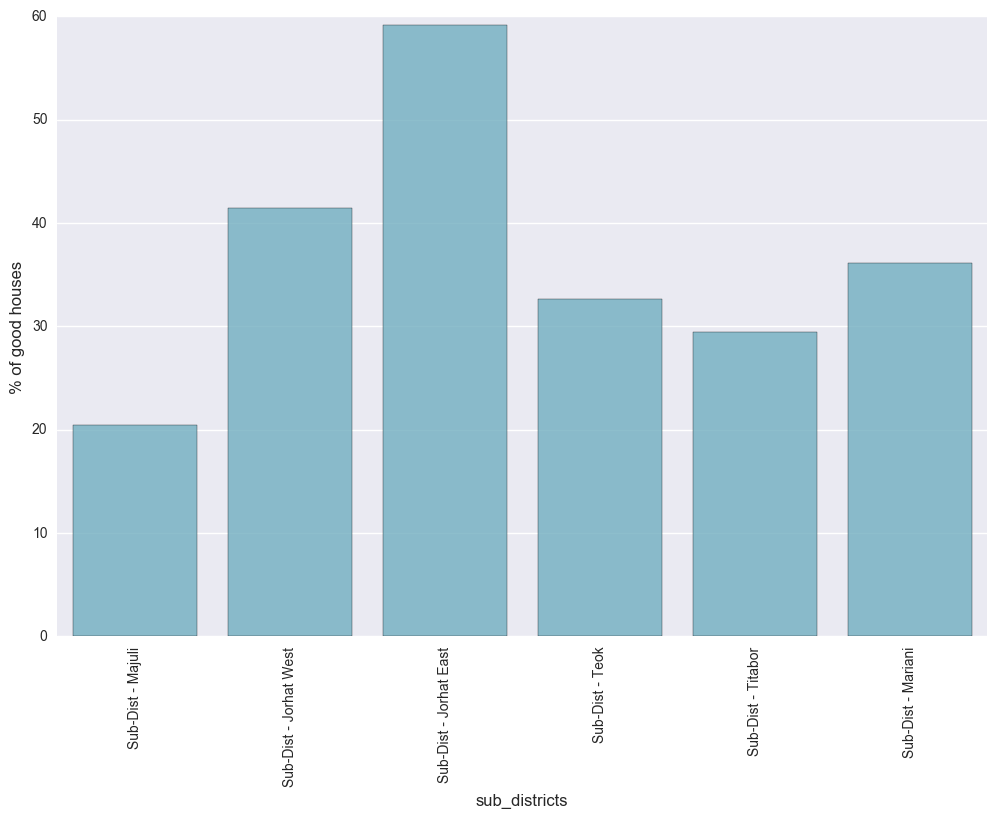

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(df_sub_district['9'], df_sub_district['12'], alpha=0.8, color=color[5])
plt.ylabel('% of good houses', fontsize=12)
plt.xlabel('sub_districts', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Jorhat East has the highest number of good houses as per census 2011.

### Let us now find the number of rural and urban wards in Jorhat East

In [13]:
a = df[df['9'] == 'Sub-Dist - Jorhat East'].index.min()
b = df[df['9'] == 'Sub-Dist - Teok'].index.min()

In [14]:
df_wards = df.ix[a:(b-1),:]

In [15]:
df_je_totals = df_wards.iloc[:3, :]
df_wards = df_wards.iloc[3:,:]
df_wards_rural = df_wards[df_wards['10']=='Rural']
df_wards_urban = df_wards[df_wards['10']=='Urban']
c = df_wards.shape[0]
d = df_wards_rural.shape[0]
e = df_wards_urban.shape[0]

In [16]:
print('Total wards in Jorhat East:', c)
print('Total Urban wards in Jorhat East:', e)
print('Total Rural wards in Jorhat East:', d)

Total wards in Jorhat East: 91
Total Urban wards in Jorhat East: 31
Total Rural wards in Jorhat East: 60


### Now let us find the urban and rural wards in Jorhat east, that have the highest and lowest number of good houses

In [17]:
rural_max = df_wards_rural['12'].max()
rural_max = df_wards_rural[df_wards_rural['12']==rural_max]
rural_min = df_wards_rural['12'].min()
rural_min = df_wards_rural[df_wards_rural['12']==rural_min]
print('Rural wards in Jorhat East with good housing:', list(rural_max['9']))
print(' ')
print('Rural wards in Jorhat East with dilapidated housing:', list(rural_min['9']))

Rural wards in Jorhat East with good housing: ['Kaibarta Salatdia', 'Koibarta Gaon']
 
Rural wards in Jorhat East with dilapidated housing: ['Nemati Chapori', 'Hatisal Chapori', 'Chomoni Chapori', 'Major Chapori', 'Mohkhuti Pathar', 'Alichiga Pathar', 'Phukanar Khat', 'Khata Pathar', 'Barhoipam']


In [18]:
urban_max = df_wards_urban['12'].max()
urban_max = df_wards_urban[df_wards_urban['12']==urban_max]
urban_min = df_wards_urban['12'].min()
urban_min = df_wards_urban[df_wards_urban['12']==urban_min]
print('Urban wards in Jorhat East with good housing:', list(urban_max['9']))
print(' ')
print('Urban wards in Jorhat East with dilapidated housing:', list(urban_min['9']))

Urban wards in Jorhat East with good housing: ['Jorhat (MB + OG) (Part) - Ward No.6']
 
Urban wards in Jorhat East with dilapidated housing: ['Jorhat (MB + OG) (Part) - Ward No.23']


In [19]:
# let us now check the drainage of all the urban areas in Jorhat.
